In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cd=pd.read_csv("crime_data.csv")
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Dropping the unnamed column

In [6]:
cd.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
array_cd=cd.values
array_cd

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

### Standardizing the values using the standard scaler

In [10]:
stscaler = StandardScaler().fit(array_cd)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### In order to train a model for DBSCAN, we need to figure out the value of eps and the number of min_samples, so, generally the no. of min_samples are usually the no. of variables or +1, in this case, taking 4. And for the value of eps, here we are using the nearest neighbors algorithm from sklearn.

In [13]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=4)
nbrs=neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

### Plotting the the data on the graph

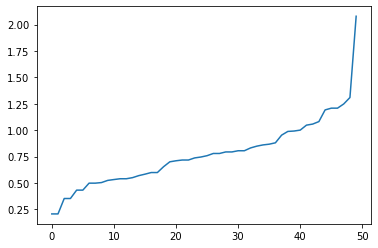

In [14]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Therefore the value of eps is where the curvature of the graph is very high. In this case the graph has a sharp curvature around 1.25. So consider 1.25 as our eps value.

In [15]:
dbscan = DBSCAN(eps=1.25, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.25, min_samples=4)

### Labelling the cluster data

In [26]:
cd_clusters=dbscan.labels_
cd_clusters
#The -1 values represents noise in the cluster data

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### The following Step is ONLY for simplification of understanding purpose and nothing more. The cluster data is represented on a scatter plot with color coding to understand the cluster more.

In [24]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

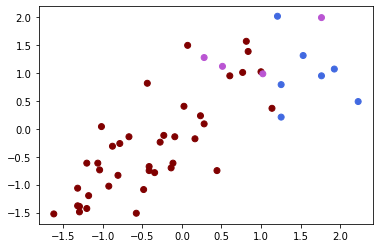

In [25]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(cd_clusters))

In [21]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [22]:
cl

,cluster
0,0
1,-1
2,1
3,1
4,-1
5,1
6,1
7,1
8,-1
9,0


### Merging the cluster ids in the original dataset

In [23]:
pd.concat([cd,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0
